# 3.1 Event data handling in Obspy

Obspy ships with multiple methods to load, plot, manipulate and save events. Within Obspy events are loaded into a [`Catalog`](https://docs.obspy.org/packages/autogen/obspy.core.event.Catalog.html).


## Contents:
* [Event loading and first inspection](#sec1)
* [Event data manipulation](#sec2)
* [Saving](#sec3)
* [Summary](#sum)


## Event loading and first inspection <a class="anchor" id="sec1"></a>

Obspys loading function for event data is the `read_events` function:

In [1]:
# Import of the event loading function
from obspy import read_events

With this one imported we are now able to load the event(s) stored in a QuakeML file:

In [2]:
# Loading of a QuakeML
catalog = read_events('data/quakeml.xml')

More information on the loaded events is gained, when `print`ing the catalog. You can also use the method `plot` which draws the location(s) of the event(s) in the catalog onto a map:

1 Event(s) in Catalog:
2020-10-30T11:51:26.100000Z | +37.897,  +26.795 | 7.0  Mww


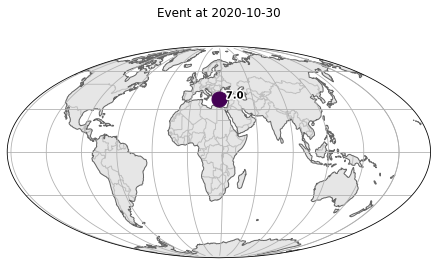

In [4]:
# Print catalog information
print(catalog)

# Plot the event location
catalog.plot();

## Event data manipulation <a class="anchor" id="sec2"></a>

Events are stored within the `catalog` in the `event` list. Let's check for details of the first event in the list.

In [6]:
# Extract event data
event = catalog.events[0]

# Print detailed information
print(event)

Event:	2020-10-30T11:51:26.100000Z | +37.897,  +26.795 | 7.0  Mww

	      resource_id: ResourceIdentifier(id="quakeml:us.anss.org/event/7000c7y0")
	       event_type: 'earthquake'
	    creation_info: CreationInfo(agency_id='us', agency_uri=ResourceIdentifier(id="smi:anss.org/metadata/agencyid/us"), creation_time=UTCDateTime(2021, 1, 20, 19, 51, 41))
	             ---------
	 focal_mechanisms: 1 Elements
	          origins: 2 Elements
	       magnitudes: 1 Elements


Let's now check for the focal mechnanism of the earthquake, so plot it using the `plot` method of the event:

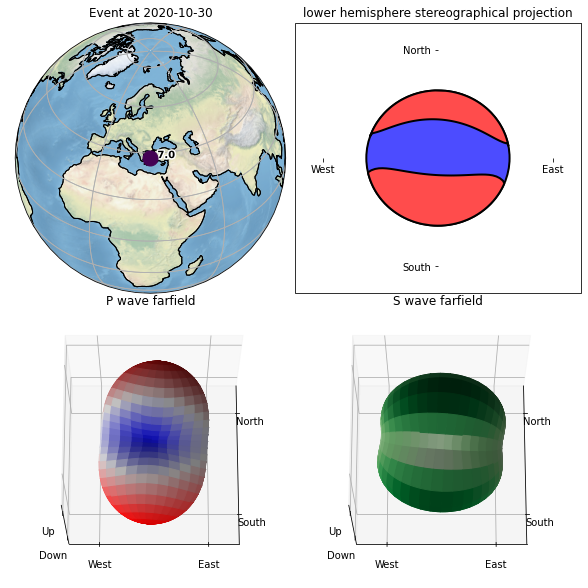

In [17]:
# Plotting of the beachball
event.plot();

Let's now assume an error in the event data, which results in a shifted location (latitude: 20.345). So we need to update the event. Therefore we need to manipulate the `origin` of the event:

In [21]:
# Extract origins of event
origins = event.origins

# Update latitude of first origin
origins[0].latitude = 20.345

When now plotting the `event` and/or the `catalog`, you can see, that the location is already updated. No further changes are required. 

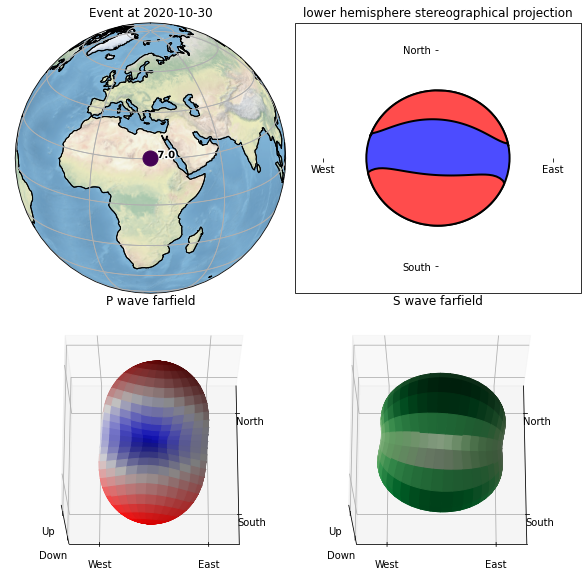

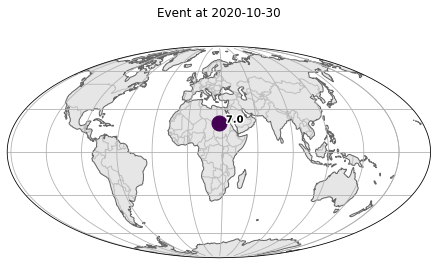

In [25]:
# event plot
event.plot();

# catalog plot
catalog.plot();

## Saving <a class="anchor" id="sec3"></a>

In order to save the manipulated `catalog` we can make use of its `write` method. Similar to the other submodules will we add a `processed_` to the filename:

In [26]:
catalog.write('processed_quakeml.xml', format='QUAKEML')

## Summary <a class="anchor" id="sum"></a>

This simple module covered the
* loading of QuakeML files with **read_events**,
* catalog plotting and inspection e.g. with **plot**,
* simple event data manipulation, here of the origin,
* catalog writing into file with **write**.